# 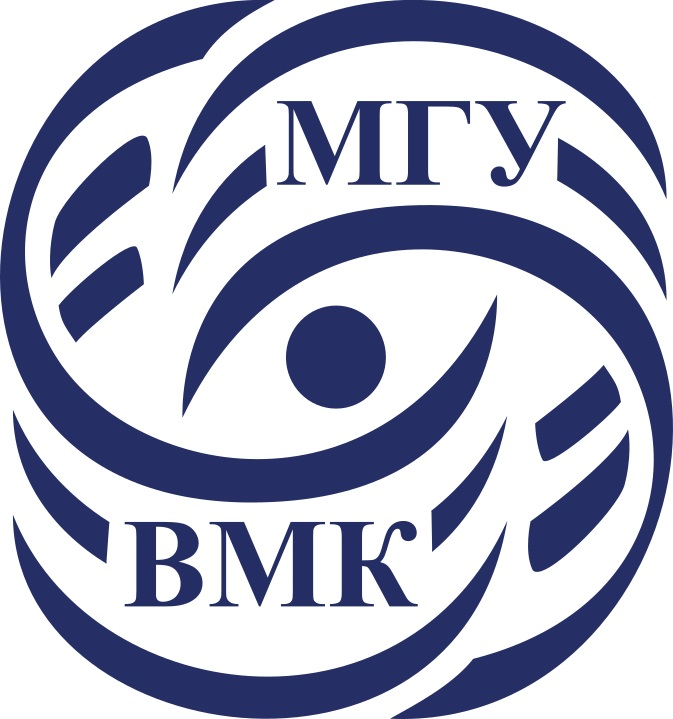

# Машинное обучение. ВМК МГУ

## Практическое задание 6: SVM

### Важно! О формате сдачи

* Практически все задания в этой части оцениваются по системе <font color='red'>кросс-рецензирования.</font>
* В этом задании есть <font color="red">новый тип задания -- ML-решение</font>
* При решении ноутбука <font color='red'>используйте данный шаблон.</font> Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно можно
* Везде, где в формулировке задания есть <font color='red'>какой-либо вопрос (или просьба вывода)</font>, необходимо прописать ответ в ячейку (код или markdown).
* Наличие <font color='red'>кода решения обязательно.</font> Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.
* Если в ячейке написана фраза <font color='red'>"Вывод"/"Ответ на вопрос" итд</font>, то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если в ячейке написано <font color='red'>"Your code here" и пр. </font>, то ожидается ответ в виде кода (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если есть и ячейка с фразой "Вывод", и ячейка с фразой "Your code here", то в ответе ожидается и код, и текст

Цель данного задания:

* Изучите работу модели SVM
* Поймете, как с её помощью можно строить нелинейные разделяющие поверхности
* Потренируетесь в подборе оптимальных параметров на обучающей выборке для достижения наилучшего качества на закрытой выборке (ML-решение)
* Узнаете про метод, который позволяет понижать число признаков и изучите его особенности на практике
* Научитесь корректировать выход модели SVM-классификатора, чтобы уметь получать вероятности

### <font color=orange>*Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: не более 10 минут (без учета ML-задачи)</font>*

## Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

**Важно!**
Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

**Важно!**
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-23-24/blob/main/tutorials/Туториал%20по%20установке%20рабочего%20окружения%20в%20Python%20для%20решения%20задач.pdf)

In [1]:
! gdown 1pIw8GdGKY6fZ_XNPc6snimdV6lbXJ199
! pip install -r /content/requirements_small.txt

Downloading...
From: https://drive.google.com/uc?id=1pIw8GdGKY6fZ_XNPc6snimdV6lbXJ199
To: /content/requirements_small.txt
100% 374/374 [00:00<00:00, 1.43MB/s]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.2/324.2 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.0 MB/s eta 

In [2]:
import catboost
assert(catboost.__version__ == '1.2.1')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2023"></font>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from copy import copy

Если Вы дальтоник, то можете воспользоваться готовой colormap из matplotlib (или найти свою):
```
plt.style.use('tableau-colorblind10')
```

In [4]:
from matplotlib.colors import ListedColormap

from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.datasets import make_blobs, make_circles, make_moons

In [5]:
def make_moons_cls(size=1000, d=2):
    X, y = make_moons(n_samples=size, noise=0.15)
    if d > 2:
        X = np.concatenate((X, np.random.normal(size=(size, d-2))), axis=1)
    return X, y

def make_circles_cls():
    X, y = make_circles()

def generate_data_with_imb_classes(size1=100, size2=10):
    X = np.r_[(
        np.random.normal(loc=1.0, size=(size1, 2)),
        np.random.normal(loc=0.5, size=(size2, 2))
    )]

    y = np.ones(len(X))
    y[-size2:] = 0
    return X, y

In [6]:
def plot_separating_surface(X, y, cls, view_support=False, title=''):
    x_min = min(X[:, 0]) - 0.1
    x_max = max(X[:, 0]) + 0.1
    y_min = min(X[:, 1]) - 0.1
    y_max = max(X[:, 1]) + 0.1
    h = 0.005
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(10, 10))
    if title:
        plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=40, cmap=cm_bright)
    if view_support:
        plt.scatter(X[cls.support_, 0], X[cls.support_, 1],
                    c=y[cls.support_], edgecolors='k', s=150, cmap=cm_bright)
    Z = Z.reshape(xx.shape)
    plt.xticks(())
    plt.yticks(())
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.3)
    plt.show()

#### Загрузим данные для задания, их же вы можете найти в cv-gml

In [7]:
import gdown
gdown.download_folder('https://drive.google.com/drive/folders/1bp39_Jj0edo1lzxZ3DIoChsOVy5DVi1R?usp=sharing')

Retrieving folder list


Retrieving folder 1tv605hGxdQtd4zC787DbcRF0312gDeK_ imbalanced
Processing file 14zd2xHDChSHtMWQ_TUzM8td7s8gzCO2u X_imb_test.npz.npy
Processing file 1Qed066d3gUsUOZiUZu6aCrIH9f0yWKSc X_imb.npz.npy
Processing file 1uD87Xbh4MMBBn5fsScrknI54SINIqory y_imb_test.npz.npy
Processing file 1RR2VU_6WJMLo88k8C1VzBwb2Ibnz1yJf y_imb.npz.npy
Retrieving folder 1uoI6vZWwIII1jd2k5TtsZTJ3JOkK0G6O public
Processing file 1Win7ZtHLHEbDtX6x6O7vBJHwJviQxbp5 cX_test.npy
Processing file 1MowPnLFAMEjjcAjDA4skE4OUFdmaiSY6 cX_train.npy
Processing file 1VYA4N5wCQhwteQSZkDogFTha2xRv0FgW cy_train.npy
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=14zd2xHDChSHtMWQ_TUzM8td7s8gzCO2u
To: /content/05-SVM/imbalanced/X_imb_test.npz.npy
100%|██████████| 2.05k/2.05k [00:00<00:00, 1.74MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Qed066d3gUsUOZiUZu6aCrIH9f0yWKSc
To: /content/05-SVM/imbalanced/X_imb.npz.npy
100%|██████████| 2.05k/2.05k [00:00<00:00, 1.30MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uD87Xbh4MMBBn5fsScrknI54SINIqory
To: /content/05-SVM/imbalanced/y_imb_test.npz.npy
100%|██████████| 1.09k/1.09k [00:00<00:00, 3.23MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RR2VU_6WJMLo88k8C1VzBwb2Ibnz1yJf
To: /content/05-SVM/imbalanced/y_imb.npz.npy
100%|██████████| 1.09k/1.09k [00:00<00:00, 2.29MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Win7ZtHLHEbDtX6x6O7vBJHwJviQxbp5
To: /content/05-SVM/public/cX_test.npy
100%|██████████| 8.13k/8.13k [00:00<00:00, 15.2MB/s]
Downloading...

['/content/05-SVM/imbalanced/X_imb_test.npz.npy',
 '/content/05-SVM/imbalanced/X_imb.npz.npy',
 '/content/05-SVM/imbalanced/y_imb_test.npz.npy',
 '/content/05-SVM/imbalanced/y_imb.npz.npy',
 '/content/05-SVM/public/cX_test.npy',
 '/content/05-SVM/public/cX_train.npy',
 '/content/05-SVM/public/cy_train.npy']

# 1. Разделяющая поверхность (1 балл)

В ячейке ниже генерируется выборка, состоящая из объектов двух классов. Каждый объект представлен двумя координатами, так что объекты этой выборки можно отобразить на плоскости, используя функцию scatter из библиотеки matplotlib.
    
В этом задании вам надо будет обучить линейную разделяющую поверхность с помощью $\mbox{sklearn.svm.SVC(kernel='linear')}$, а также нелинейную c rbf-ядром с помощью $\mbox{sklearn.svm.SVC(kernel='rbf')}$. Остальные параметры методов можете оставить дефолтными. Делить выборку на обучение и валидацию сейчас не требуется, так как нас будет пока интересовать только форма разделяющей кривой.

In [ ]:
X, y = make_moons_cls()
linear_svc = SVC(kernel='linear')
nonlinear_svc = SVC(kernel='rbf')

Визуализируем выборку

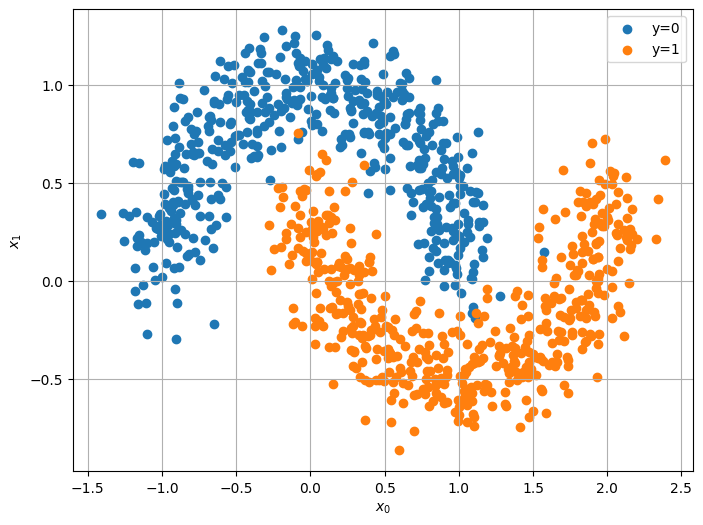

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='y=0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='y=1')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.legend()
plt.grid()

Обучите модели и визуализируйте разделяющую поверхность для обеих моделей с помощью функции plot_separating_surface(). Посчитайте точность (accuracy) на обучающей выборке для каждой из моделей.

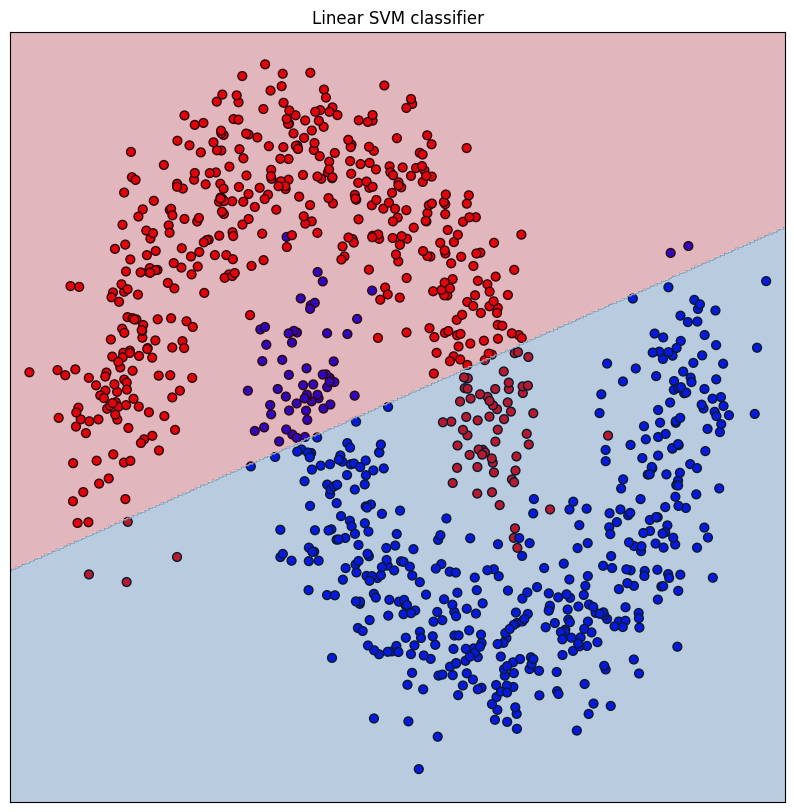

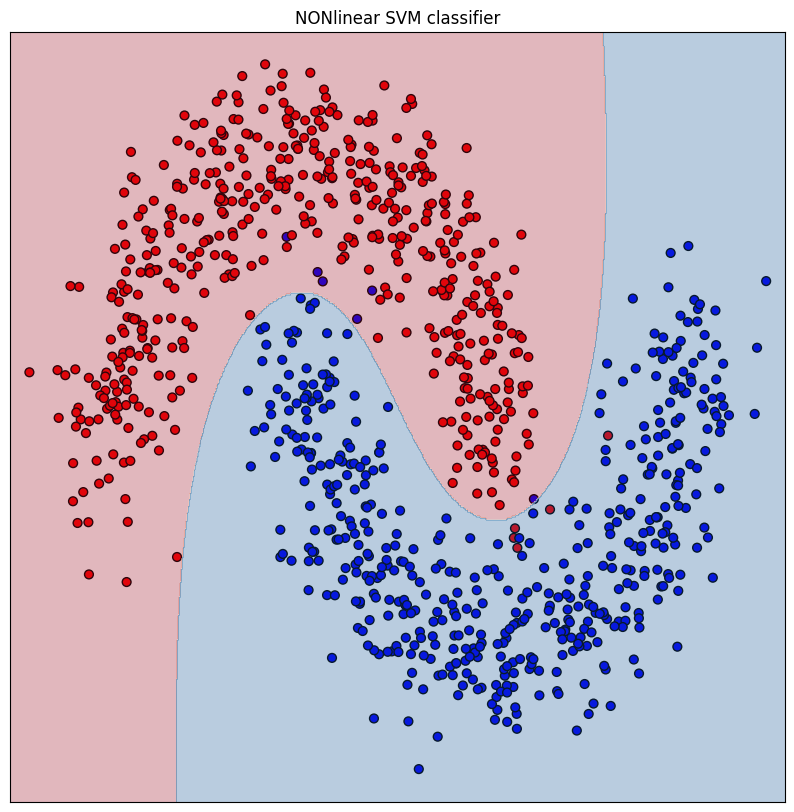

Train Accuracy (linear): 0.877
Train Accuracy (non linear): 0.989


In [ ]:
linear_svc.fit(X, y)
nonlinear_svc.fit(X, y)

plot_separating_surface(X, y, linear_svc, view_support=False, title='Linear SVM classifier')
plot_separating_surface(X, y, nonlinear_svc, view_support=False, title='NONlinear SVM classifier')

print(f'Train Accuracy (linear): {accuracy_score(y, linear_svc.predict(X)):.3f}')
print(f'Train Accuracy (non linear): {accuracy_score(y, nonlinear_svc.predict(X)):.3f}')

**Сделайте вывод**
о получившихся результатах. Какая из моделей лучше подходит для данной выборки и почему?

**Вывод:** Очевидно, модель с РБФ-ядром гораздо лучше классифицирует объекты. Это ясно не только визуально, но и по accuracy_score. <br>
Причина - в том, что классы не разделимы гиперплоскостью, но при использовании ядерных трюков все прокатывает

# 2. Опорные объекты (2 балла)

Продолжаем работать с выборкой и моделями из первой части. Для линейной и rbf-моделей рассмотрим
    опорные объекты, полученные после обучения. Визуализировать их можно, используя функуцию plot_separating_surface с параметром vis_support=True. Достанем опорные объекты из обученной модели с помощью поля model.support_.

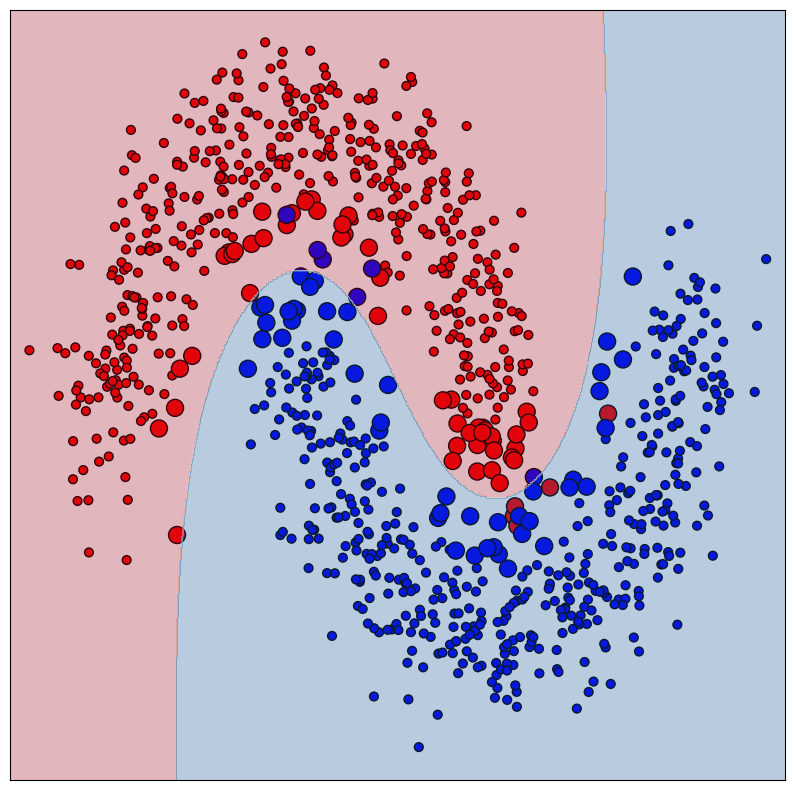

In [ ]:
plot_separating_surface(X, y, nonlinear_svc, view_support=True)

**Пункт 1**
Обучим новые две модели $\mbox{SVC(kernel='rbf')}$, используя только опорные объекты построенные с помощью соответственно линейной (linear_svc) и нелинейной (nonlinear_svc) моделей из первой части.

In [ ]:
# Учим модели только на опорных объектах
svc_on_linear_support = SVC(kernel='rbf').fit(X[linear_svc.support_, :], y[linear_svc.support_])
svc_on_rbf_support = SVC(kernel='rbf').fit(X[nonlinear_svc.support_, :], y[nonlinear_svc.support_])

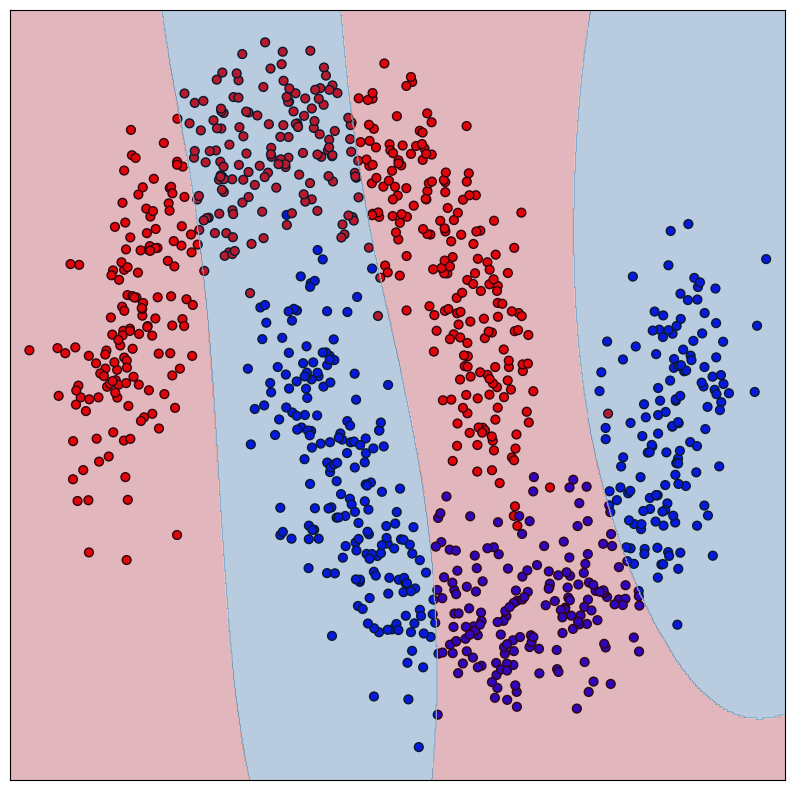

In [ ]:
plot_separating_surface(X, y, svc_on_linear_support)

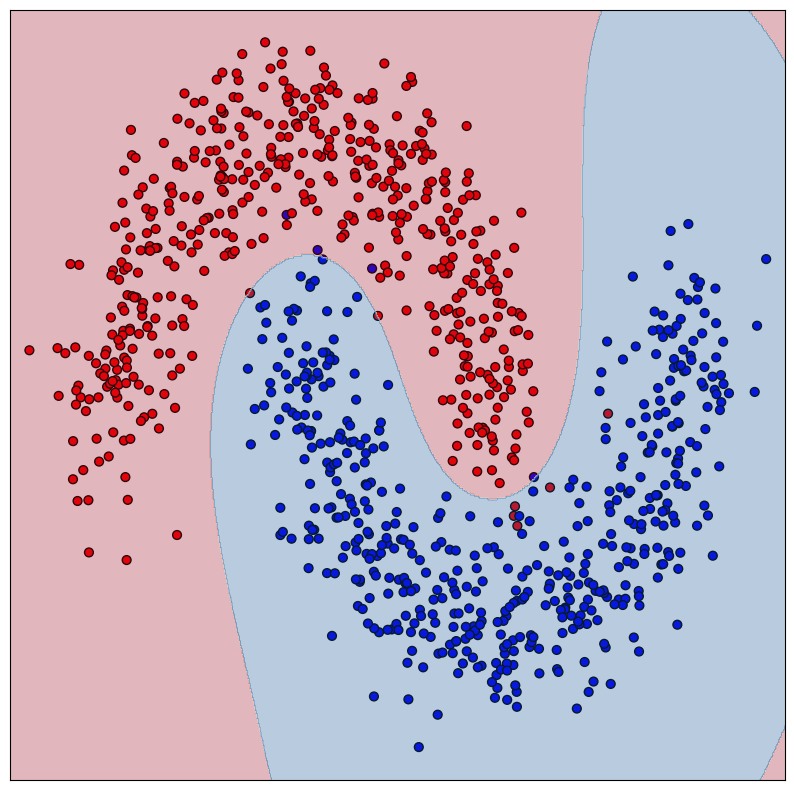

In [ ]:
plot_separating_surface(X, y, svc_on_rbf_support)

**Задание:** Сравните полученные разделяющие поверхности с нелинейной моделью (nonlinear_svc) из первой части. Какая из поверхностей больше похожа на нелинейную модель из первой части и почему, опишите в выводе.

**Вывод:** Конечно, нижняя, где применяем нелинейную модель. Так как именно опорные объекты главным образом определяют форму разделяющей поверхности (границы между классами).

**Пункт 2** Обучим модель $\mbox{SVC(kernel='rbf')}$, используя все объекты кроме тех, что являлись опорными для нелинейной модели из первой части (nonlinear_svc) и сравним эту модель вместе с svc_on_rbf_support с нелинейной моделью из первой части (nonlinear_svc). Визуализируйте разделяющие поверхности обеих моделей.

In [ ]:
non_support_vectors = [i for i in range(len(X)) if i not in nonlinear_svc.support_]
svc_all_without_rbf_support = SVC(kernel='rbf').fit(X[non_support_vectors, :], y[non_support_vectors])

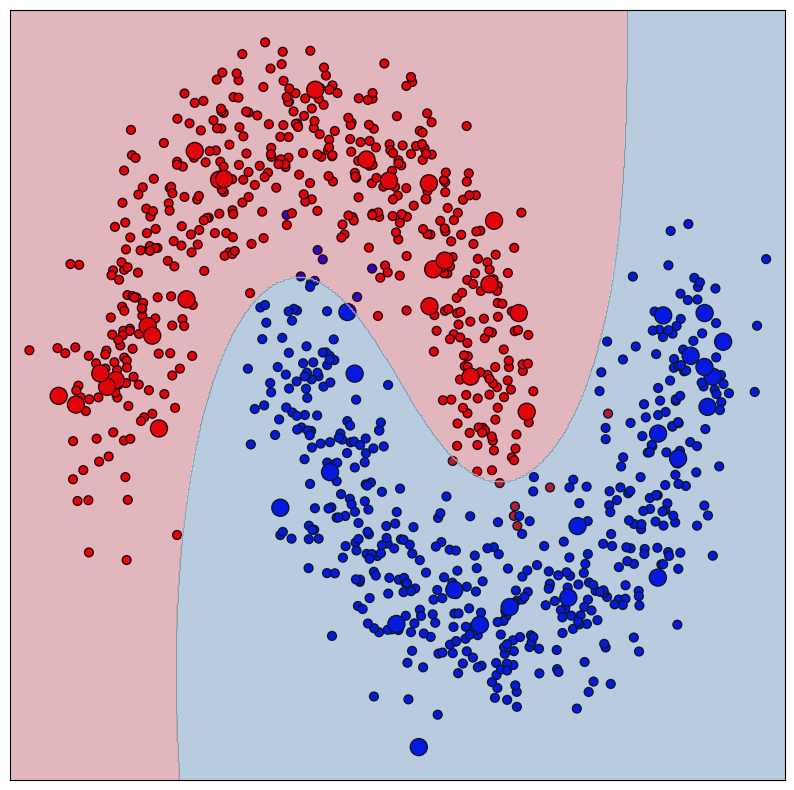

In [ ]:
plot_separating_surface(X, y, svc_all_without_rbf_support, view_support=True)

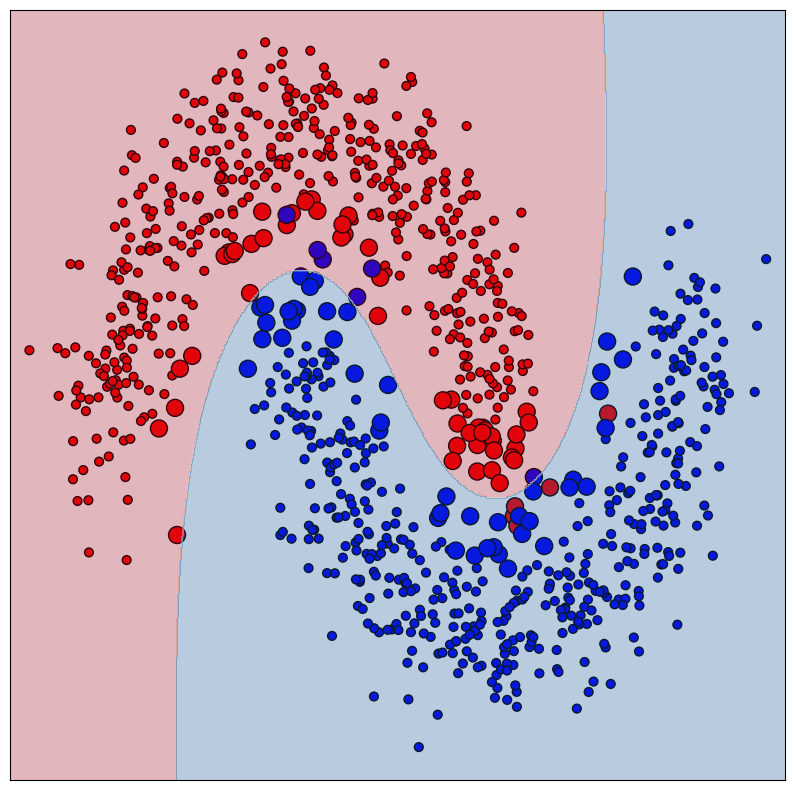

In [ ]:
plot_separating_surface(X, y, nonlinear_svc, view_support=True)

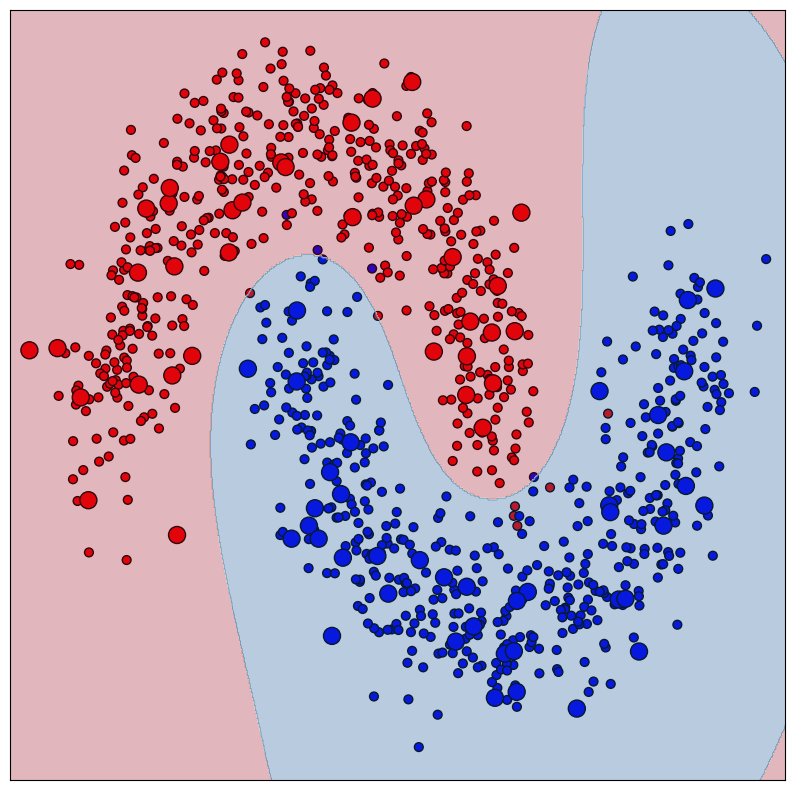

In [ ]:
plot_separating_surface(X, y, svc_on_rbf_support, view_support=True)

**Сделайте вывод:** Сильно ли полученные поверхности отличаются от той, что была получена в первой части? Что произошло с пограничными объектами? Объясните полученные результаты.

In [ ]:
print(f'Train Accuracy (svc all without rbf support): {accuracy_score(y, svc_all_without_rbf_support.predict(X)):.3f}')
print(f'Train Accuracy (svc on rbf support): {accuracy_score(y, svc_on_rbf_support.predict(X)):.3f}')
print(f'Train Accuracy (non linear): {accuracy_score(y, nonlinear_svc.predict(X)):.3f}')

Train Accuracy (svc all without rbf support): 0.987
Train Accuracy (svc on rbf support): 0.990
Train Accuracy (non linear): 0.989


**Вывод:** Хотя все эти модели отлично описывают реальное разделение между классами, все же accuracy_score таковы, какими они приведены выше. <br>
Так, модель, основанная только на опорных векторах, лучше всего описывает разделение. Но главное, что модель с убранными старыми опорными векторами хуже описывает разделение (all without rbf support vectors). <br>
Нам просто повезло, что новые опорные векторы так похожи на старые, и получаем высокий скор, однако он все же ниже, ведь новые опорные векторы отличны от старых, а старые позволяют наилучшим образом построить модель.

# 3. Форма разделяющей поверхности для несбалансированных классов (3 балла)

Формы разделяющих поверхностей могут быть вариативными для нелинейного случая. Иногда, выбранная форма поверхности может плохо подходить для целевого распределения объектов. Особенно это может быть заметно, если соотношение  классов в обучении отличается от тестового. Такое свойственно медицинским данным, где в обучающих данных часто наблюдается перекос в сторону больных, так как именно их данные чаще собираются.

Давайте обучим SVC на несбалансированных данных и построим разделяющую поверхность для тестовой выборки с другим соотношением классов.

In [ ]:
X_distr1 = np.load('05-SVM/imbalanced/X_imb.npz.npy')
y_distr1 = np.load('05-SVM/imbalanced/y_imb.npz.npy')
X_distr2 = np.load('05-SVM/imbalanced/X_imb_test.npz.npy')
y_distr2 = np.load('05-SVM/imbalanced/y_imb_test.npz.npy')

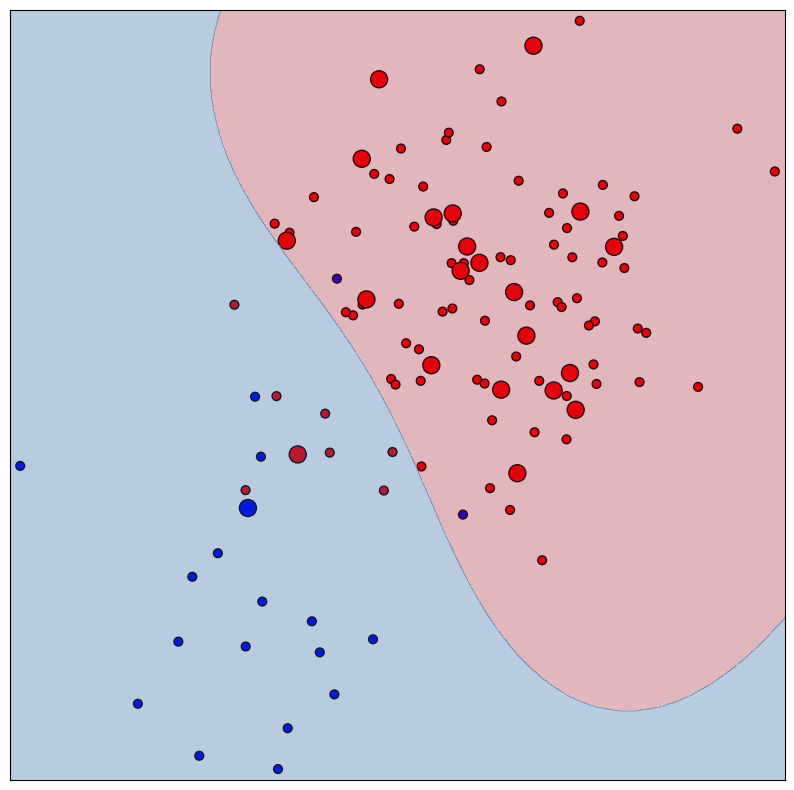

In [ ]:
# Модель с дефолтными параметрами, которую Вам предстоит улучшить
base_model = SVC()
base_model.fit(X_distr1, y_distr1)
plot_separating_surface(X_distr2, y_distr2, base_model, view_support=True)

-----------
<font color="white" style="opacity:0.2023"></font>

Так как синих объектов было существенно больше в обучении, разделяющая поверхность отнесла к этому классу большую часть пространства около границы классов. При этом, из-за возросшего количества красных объектов в тестовой выборке, многие из них стали ошибочно относиться к другому классу.

Один из способов исправить эту проблему - это повлиять на форму поверхности с помощью задания весов классов, которые задаются через параметр class_weight в sklearn.svm.SVC. Особенно это может быть полезно в задачах, где известно, что распределение классов в обучающей выборке отличается от реального.
    
В данном задании вам будет дана выборка с несбалансированными данными. Кроме того, дана вторая выборка,
в которой классы имеют то же распределение, но классы имеют другое соотношение.  **Вам нужно построить различные rbf-модели, меняя параметры весов классов и визуализировать разделяющие поверхности. Попробуйте улучшить
качество на второй выборке (X_distr2, y_distr2), обучаясь только на первой (X_distr1, y_distr1) меняя параметры весов классов относительно дефолтных: class_weight={1: 1.0, 0: 1.0}. В качестве метрики, которую нужно оптимизировать нужно использовать accuracy на (X_distr2, y_dist2).**

In [8]:
from itertools import product

In [ ]:
reg_const = 1.0

In [ ]:
w1_best, w2_best = None, None
best_acc = None
grid = [0.01, 0.1, 0.5, 1.0, 5, 10, 100, 1000]
for w1, w2 in product(grid, grid):
    svc_cls = SVC(C=reg_const, class_weight={1: w1, 0: w2})
    svc_cls.fit(X_distr1, y_distr1)
    acc = accuracy_score(y_distr2, svc_cls.predict(X_distr2))
    # Save model with best accuracy
    if not best_acc or best_acc < acc:
        w1_best = w1
        w2_best = w2
        best_acc = acc


print(f'Weight1: {w1_best}\nWeight2: {w2_best}\nBest accuracy: {best_acc}')

Weight1: 0.1
Weight2: 5
Best accuracy: 0.9666666666666667


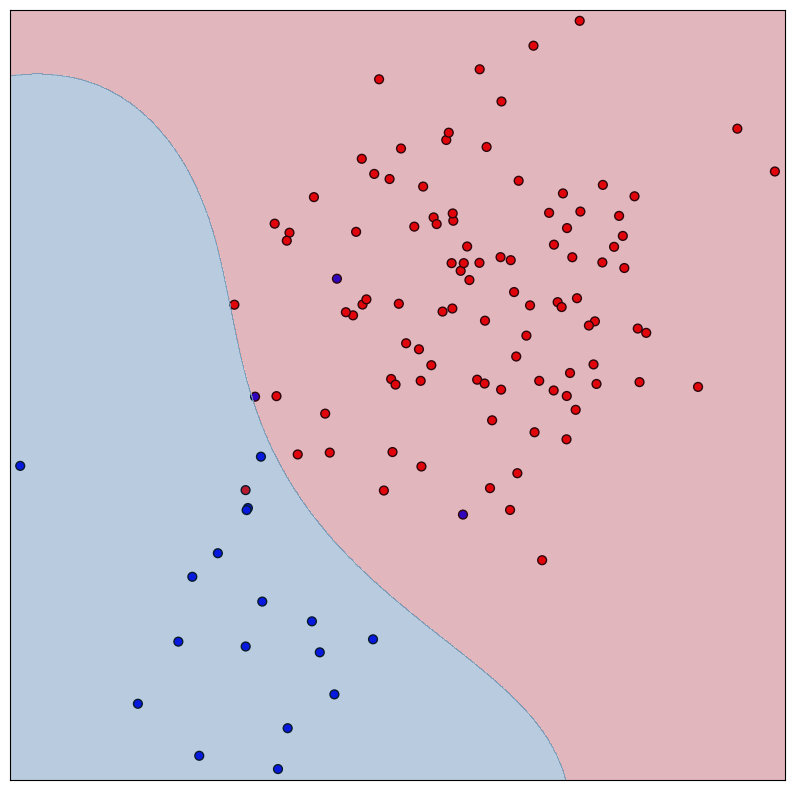

In [ ]:
best_svc_cls = SVC(C=reg_const, class_weight={1: w1_best, 0: w2_best})
best_svc_cls.fit(X_distr1, y_distr1)
plot_separating_surface(X_distr2, y_distr2, best_svc_cls)

In [ ]:
print('My best classifier:')
print('Accuracy:', accuracy_score(y_distr2, best_svc_cls.predict(X_distr2)))

My best classifier:
Accuracy: 0.9666666666666667


# 4. Обучите лучшую SVM модель (ML-решение)

Возможность строить нелинейные поверхности может сильно улучшить качество, но и несет риск переобучения.
    В этом задании предстоит обучить лучшую svm модель и получить хорошее качество на тесте в системе тестирования. Для контроля переобучения рекомендуется пользоваться кросс-валидацией. Для улучшения качества рекомендуется подбирать

1. параметр регуляризации C;
2. тип разделяющей кривой linear/rbf/poly;
3. степень в случае разделяющей кривой poly.

Также не забывайте, что при решении задач машинного обучения полезно смотреть в данные :)

Все csv-таблицы с данными вы можете взять из публичного теста, который также есть в проверяющей системе. Для этого распакуйте архив с публичными тестами и положите файлы в рабочей директории (рядом с ноутбуком)

In [9]:
X_train = np.load('05-SVM/public/cX_train.npy')
y_train = np.load('05-SVM/public/cy_train.npy')
X_test = np.load('05-SVM/public/cX_test.npy')

In [ ]:
X_train.shape, y_train.shape, X_test.shape

((800, 5), (800,), (200, 5))

In [10]:
X = X_train
y = y_train.ravel()

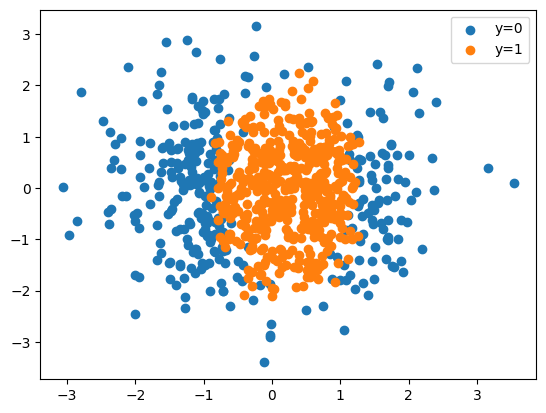

In [ ]:
plt.scatter(X[y == 0, 4], X[y == 0, 3], label='y=0')
plt.scatter(X[y == 1, 4], X[y == 1, 3], label='y=1')
plt.legend()

In [ ]:
params = []

In [ ]:
n_folds = 3

In [11]:
from sklearn.model_selection import train_test_split

In [ ]:
w1_best, w2_best = None, None
best_acc = None
grid = [0.01, 0.1, 0.5, 1.0, 5, 10, 100]
c_grid = [0.001, 0.01, 0.1, 1, 2]
ker_grid = ['linear']

accs = []
iternums = 0

for w1, w2, c, ker in product(grid, grid, c_grid, ker_grid):
    params.append((w1, w2, c, ker))
    iternums += 1
    if iternums % 10 == 0:
        print(iternums)
    svc_cls = SVC(C=c, kernel=ker, class_weight={1: w1, 0: w2})

    temp_acc = 0
    for i in range(n_folds):
        X_tr, X_te, y_tr, y_te = train_test_split(
            X_train, y, test_size=0.33, shuffle=True)
        svc_cls.fit(X_tr, y_tr)
        acc = accuracy_score(y_te, svc_cls.predict(X_te))
        temp_acc += acc

    accs.append(temp_acc / n_folds)
    # Save model with best accuracy
    if not best_acc or best_acc < acc:
        c_best = c
        ker_best = ker
        w1_best = w1
        w2_best = w2
        best_acc = acc


ker_grid = ['rbf']

iternums = 0

for w1, w2, c, ker in product(grid, grid, c_grid, ker_grid):
    params.append((w1, w2, c, ker))
    iternums += 1
    if iternums % 10 == 0:
        print(iternums)
    svc_cls = SVC(C=c, kernel=ker, class_weight={1: w1, 0: w2})

    temp_acc = 0
    for i in range(n_folds):
        X_tr, X_te, y_tr, y_te = train_test_split(
            X_train, y, test_size=0.33, shuffle=True)
        svc_cls.fit(X_tr, y_tr)
        acc = accuracy_score(y_te, svc_cls.predict(X_te))
        temp_acc += acc

    accs.append(temp_acc / n_folds)
    # Save model with best accuracy
    if not best_acc or best_acc < acc:
        c_best = c
        ker_best = ker
        w1_best = w1
        w2_best = w2
        best_acc = acc

deg_grid = [1,2,3,4,5,6,7,8,9,10]
ker_grid=['poly']
best_deg = 0
iternums = 0

for w1, w2, c, ker, deg in product(grid, grid, c_grid, ker_grid, deg_grid):
    params.append((w1, w2, c, ker, deg))
    iternums += 1
    if iternums % 10 == 0:
        print(iternums)
    svc_cls = SVC(C=c, kernel=ker, class_weight={1: w1, 0: w2}, degree=deg)

    temp_acc = 0
    for i in range(n_folds):
        X_tr, X_te, y_tr, y_te = train_test_split(
            X_train, y, test_size=0.33, shuffle=True)
        svc_cls.fit(X_tr, y_tr)
        acc = accuracy_score(y_te, svc_cls.predict(X_te))
        temp_acc += acc

    accs.append(temp_acc / n_folds)
    # Save model with best accuracy
    if not best_acc or best_acc < acc:
        c_best = c
        ker_best = ker
        w1_best = w1
        w2_best = w2
        best_acc = acc

ker_grid = ['sigmoid']

iternums = 0

for w1, w2, c, ker in product(grid, grid, c_grid, ker_grid):
    params.append((w1, w2, c, ker))
    iternums += 1
    if iternums % 10 == 0:
        print(iternums)
    svc_cls = SVC(C=c, kernel=ker, class_weight={1: w1, 0: w2})

    temp_acc = 0
    for i in range(n_folds):
        X_tr, X_te, y_tr, y_te = train_test_split(
            X_train, y, test_size=0.33, shuffle=True)
        svc_cls.fit(X_tr, y_tr)
        acc = accuracy_score(y_te, svc_cls.predict(X_te))
        temp_acc += acc

    accs.append(temp_acc / n_folds)
    # Save model with best accuracy
    if not best_acc or best_acc < acc:
        c_best = c
        ker_best = ker
        w1_best = w1
        w2_best = w2
        best_acc = acc

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870

In [ ]:
iternum = 10
for val in sorted(accs, reverse=True):
    iternum -= 1
    print(val, params[accs.index(val)])
    if iternum == 0:
        break

0.922979797979798 (10, 10, 2, 'rbf')
0.9217171717171716 (5, 10, 1, 'rbf')
0.9166666666666666 (10, 10, 1, 'rbf')
0.9166666666666666 (10, 10, 1, 'rbf')
0.9154040404040403 (0.5, 0.5, 2, 'rbf')
0.9154040404040403 (0.5, 0.5, 2, 'rbf')
0.9154040404040403 (0.5, 0.5, 2, 'rbf')
0.914141414141414 (0.5, 1.0, 2, 'rbf')
0.914141414141414 (0.5, 1.0, 2, 'rbf')
0.914141414141414 (0.5, 1.0, 2, 'rbf')


Ага, РБФ. Ну, это и было видно из формы данных :) <br>
Поиграемся с РБФ еще немножко

In [ ]:
ker_grid = ['rbf']
grid = [1, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 10]
c_grid = [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3]
new_accs = []
new_params = []

iternums = 0

for w1, w2, c, ker in product(grid, grid, c_grid, ker_grid):
    new_params.append((w1, w2, c, ker))
    iternums += 1
    if iternums % 10 == 0:
        print(iternums)
    svc_cls = SVC(C=c, kernel=ker, class_weight={1: w1, 0: w2})

    temp_acc = 0
    for i in range(n_folds):
        X_tr, X_te, y_tr, y_te = train_test_split(
            X_train, y, test_size=0.33, shuffle=True)
        svc_cls.fit(X_tr, y_tr)
        acc = accuracy_score(y_te, svc_cls.predict(X_te))
        temp_acc += acc

    new_accs.append(temp_acc / n_folds)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
222

In [ ]:
iternum = 10
for val in sorted(new_accs, reverse=True):
    iternum -= 1
    print(val, new_params[new_accs.index(val)])
    if iternum == 0:
        break

0.9356060606060606 (8, 6, 3, 'rbf')
0.9343434343434344 (8.5, 10, 1.5, 'rbf')
0.9343434343434343 (3.5, 6, 1, 'rbf')
0.9343434343434343 (3.5, 6, 1, 'rbf')
0.933080808080808 (9, 7.5, 2, 'rbf')
0.9318181818181818 (5, 8, 3, 'rbf')
0.9318181818181818 (5, 8, 3, 'rbf')
0.9305555555555557 (3.5, 8.5, 2, 'rbf')
0.9305555555555555 (3, 3, 1, 'rbf')
0.9305555555555555 (3, 3, 1, 'rbf')


Если усреднить соотношение весов в спсике выше, будет 1.47.
Это примерно 8 к 5.5. <br> Обучим именно такую модель.
Выберем константу регуляризации 1.5, т.к. она выглядит самой правдоподобной, если смотреть на список выше.
<br> Обучаем модель с такими параметрами и отправляем в проверяющую систему :)

**Отправьте код обучения модели с оптимальными параметрами в проверяющую систему, воспользовавшись приложенным шаблоном svm_solution.py. Кросс-валидацию параметров в посылаемом решении делать <font color='red'>не нужно</font> -- достаточно подобрать, например, их тут, а в решении уже обучать модель с оптимальными параметрами.**

# 4. Влияние гиперпараметров (4 балла)

В предыдущей части Вы обучили хорошую SVM модель, подбирая гиперпараметры модели. Давайте теперь попробуем обучить логистическую регрессию на этой же выборке, и по кросс-валидации оценить влияние гиперпараметров на линейную модель.

In [12]:
from sklearn.linear_model import LogisticRegression

In [ ]:
n_folds = 3

In [ ]:
cls = LogisticRegression(penalty='l2')

grid = [0.01, 0.1, 0.5, 1.0, 5, 10, 100]
c_grid = [0.001, 0.01, 0.1, 1, 2, 2.5, 3]
pen_grid = ['l1', 'l2', 'elasticnet', None]

accs = []
params = []
iternums = 0

for w1, w2, c, pen in product(grid, grid, c_grid, pen_grid):
    params.append((w1, w2, c, pen))
    iternums += 1
    if iternums % 10 == 0:
        print(iternums)
    cls = LogisticRegression(penalty=pen, C=c, class_weight={1: w1, 0: w2}, solver='saga', l1_ratio=0.5)

    temp_acc = 0
    for i in range(n_folds):
        X_tr, X_te, y_tr, y_te = train_test_split(
            X_train, y, test_size=0.33, shuffle=True)
        cls.fit(X_tr, y_tr)
        acc = accuracy_score(y_te, cls.predict(X_te))
        temp_acc += acc

    accs.append(temp_acc / n_folds)

In [ ]:
max(accs)

0.8017676767676768

In [ ]:
iternum = 10
for val in sorted(accs, reverse=True):
    iternum -= 1
    print(val, params[accs.index(val)])
    if iternum == 0:
        break

0.8017676767676768 (0.5, 0.5, 2, 'l2')
0.8005050505050505 (0.1, 0.1, 3, 'l2')
0.8005050505050505 (0.1, 0.1, 3, 'l2')
0.797979797979798 (0.1, 0.1, 2, 'elasticnet')
0.7967171717171717 (0.1, 0.1, 1, 'elasticnet')
0.7954545454545455 (0.5, 0.5, 0.001, None)
0.7954545454545454 (0.1, 0.1, 2, 'l2')
0.7954545454545454 (0.1, 0.1, 2, 'l2')
0.7954545454545454 (0.1, 0.1, 2, 'l2')
0.7954545454545454 (0.1, 0.1, 2, 'l2')


Сделайте выводы о влиянии выбора гиперпараметров на качество обучения линейной и SVC моделей. Также опишите, какие преобразования выборки/подбор каких гиперпараметров помогли добиться высокого качества на кросс-валидации в данной задаче.

**Вывод:** Вспомним два списка: 1 - SVM, 2 - LogReg. И визуально сравним.
<h3> LogReg:

In [ ]:
'''
0.8017676767676768 (0.5, 0.5, 2, 'l2')
0.8005050505050505 (0.1, 0.1, 3, 'l2')
0.8005050505050505 (0.1, 0.1, 3, 'l2')
0.797979797979798 (0.1, 0.1, 2, 'elasticnet')
0.7967171717171717 (0.1, 0.1, 1, 'elasticnet')
0.7954545454545455 (0.5, 0.5, 0.001, None)
0.7954545454545454 (0.1, 0.1, 2, 'l2')
0.7954545454545454 (0.1, 0.1, 2, 'l2')
0.7954545454545454 (0.1, 0.1, 2, 'l2')
0.7954545454545454 (0.1, 0.1, 2, 'l2')
'''

<h3> SVM

In [ ]:
'''
0.922979797979798 (10, 10, 2, 'rbf')
0.9217171717171716 (5, 10, 1, 'rbf')
0.9166666666666666 (10, 10, 1, 'rbf')
0.9166666666666666 (10, 10, 1, 'rbf')
0.9154040404040403 (0.5, 0.5, 2, 'rbf')
0.9154040404040403 (0.5, 0.5, 2, 'rbf')
0.9154040404040403 (0.5, 0.5, 2, 'rbf')
0.914141414141414 (0.5, 1.0, 2, 'rbf')
0.914141414141414 (0.5, 1.0, 2, 'rbf')
0.914141414141414 (0.5, 1.0, 2, 'rbf')
'''

<h4> Выводы: <br>
Во-первых, SVM в данной задаче лучше (по крайней мере с РБФ ядром). <br>
Во-вторых для лог. регрессии, кажется, не так существенна разбалансировка классов в трейне (в отличие от СВМа). <br>
В-третьих, константа регуляризации имеет примерно равное влияние на точность предсказания в обеих случаях. <br>
В общем и целом, гиперпараметры, очевидно, оказывают влияние на качество обучения, и приведенные данные подтверждают это :) <br>

# 5. Ограничения SVM (3 балла)

В предыдущих заданиях мы убедились в мощности и гибкости моделей SVM. Теперь ответим на вопрос, насколько реально обучить модель SVM на выборках большого размера или с большим числом признаков.
    
   Нужно провести два эксперимента. В первом перебирать размер выборки
    и для каждого запуска посчитать реальное время обучения модели. При этом
    делить выборку на обучение и тестирование не нужно. Также качество обученной модели в данном эксперименте не имеет значение. Размеры выборки предлагается перебирать в диапазоне range(1000, 10001, 1000) с использованием generate_data_with_balanced_classes(size=n).
    
   Необходимо сравнить время обучения SVM с логистической регрессией. Для этого
    замеры повторите также для модели sklearn.linear_model.LogisticRegression. Время обучения одной модели замеряйте
    с помощью стандартной библиотеки time (пример в ячейке ниже).
    
Вы можете поставить эксперименты и с большими выборками, чем предлагается в задании (сгенерировать их),  
тогда эффект должен быть виден еще сильнее.

**Внимание!** во время замеров времени работы, отключите сторонние процессы, занимающие CPU, иначе замеры времени работы окажутся некорректными. Помните, что времени работы в зависимости от числа данных и признаков должно меняться монотонно, без ступенчатых изменений (за исключением небольшого шума).

In [22]:
# Как замерять время
import time
time_start = time.time()
time.sleep(1) # Вместо этой команды - запуск замеряемого алгоритма
print("Время работы:", time.time() - time_start)

Время работы: 1.0014984607696533


In [ ]:
def generate_data_with_balanced_classes(size=500, d=2, noise_scale=0.1):
    X = np.random.normal(size=(size*2, d))
    mask = X[:, 1] ** 2 > X[:, 0] - 0.1 + np.random.normal(scale=noise_scale)
    y = np.ones(len(X))
    y[mask] = 0
    return X, y

In [ ]:
time_start = time.time()
for size in range(1000, 100001, 1000):
    generate_data_with_balanced_classes(size=size, d=2, noise_scale=0.1)
    svc_cls = SVC()
    svc_cls.fit(X, y)

print("Время работы SVM-cls:", time.time() - time_start)

time_start = time.time()
for size in range(1000, 100001, 1000):
    generate_data_with_balanced_classes(size=size, d=2, noise_scale=0.1)
    logreg_cls = LogisticRegression(penalty='l2')
    logreg_cls.fit(X, y)

print("Время работы LogReg-cls:", time.time() - time_start)

Время работы SVM-cls: 2.379472494125366
Время работы LogReg-cls: 1.1929569244384766


Во втором эксперименте предлагается проделать то же самое, что и в первом эксперименте, только меняя размерность пространства признаков.
    Для этого можете воспользоваться функцией generate_data_with_balanced_classes(dim=d). Признаки предлагается перебирать по сетке $range(10, 1001, 100)$.

Low-dim

In [ ]:
time_start = time.time()
for dim in range(2, 11):
    generate_data_with_balanced_classes(size=size, d=dim, noise_scale=0.1)
    svc_cls = SVC()
    svc_cls.fit(X, y)

print("Время работы SVM-cls:", time.time() - time_start)

time_start = time.time()
for dim in range(2, 11):
    generate_data_with_balanced_classes(size=size, d=dim, noise_scale=0.1)
    logreg_cls = LogisticRegression(penalty='l2')
    logreg_cls.fit(X, y)

print("Время работы LogReg-cls:", time.time() - time_start)

Время работы SVM-cls: 0.553295373916626
Время работы LogReg-cls: 0.46218395233154297


Hi-dim

In [ ]:
time_start = time.time()
for dim in range(100, 111):
    generate_data_with_balanced_classes(size=size, d=dim, noise_scale=0.1)
    svc_cls = SVC()
    svc_cls.fit(X, y)

print("Время работы SVM-cls:", time.time() - time_start)

time_start = time.time()
for dim in range(100, 111):
    generate_data_with_balanced_classes(size=size, d=dim, noise_scale=0.1)
    logreg_cls = LogisticRegression(penalty='l2')
    logreg_cls.fit(X, y)

print("Время работы LogReg-cls:", time.time() - time_start)

Время работы SVM-cls: 9.60174822807312
Время работы LogReg-cls: 8.846594333648682


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sizes = [10, 100, 1000, 10000]
times_svc = []
times_logreg = []

In [ ]:
for size_ord in sizes:
    for size in range(size_ord, size_ord * 10, size_ord):
        temp_time = 0
        for i in range(100):
            generate_data_with_balanced_classes(size=size, d=40, noise_scale=0.1)
            time_start = time.time()
            svc_cls = SVC()
            svc_cls.fit(X, y)
            temp_time += time.time() - time_start
        times_svc.append(temp_time / 10)

for size_ord in sizes:
    for size in range(size_ord, size_ord * 10, size_ord):
        temp_time = 0
        for i in range(100):
            generate_data_with_balanced_classes(size=size, d=40, noise_scale=0.1)
            time_start = time.time()
            logreg_cls = LogisticRegression(penalty='l2')
            logreg_cls.fit(X, y)
            temp_time += time.time() - time_start
        times_logreg.append(temp_time / 10)

In [ ]:
allsizes = []
for size_ord in sizes:
    for size in range(size_ord, size_ord * 10, size_ord):
        allsizes.append(size)

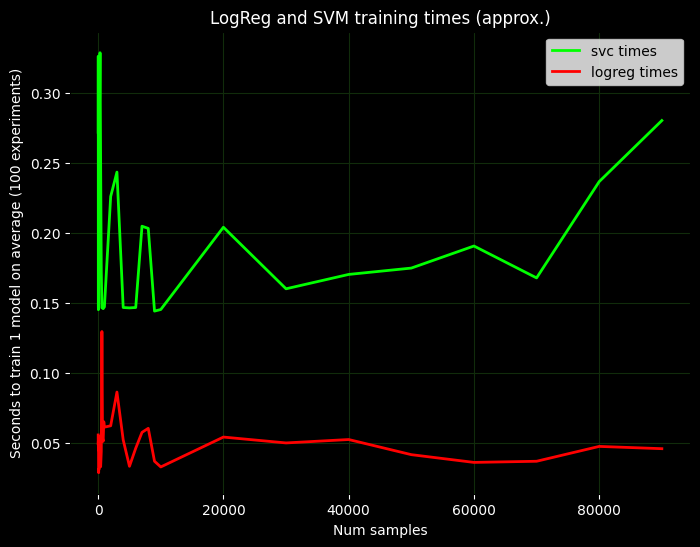

In [ ]:
# PLOT PLOT PLOT PLOT PLOT PLOT
dgreen="#112C0B"

fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title("LogReg and SVM training times (approx.)", color='white')
plt.xlabel("Num samples", color='white')
plt.ylabel("Seconds to train 1 model on average (100 experiments)", color='white')

sns.lineplot(x=allsizes, y=times_svc, label="svc times", legend=True, color="lime", linewidth=2)
sns.lineplot(x=allsizes, y=times_logreg, label="logreg times", legend=True, color="red", linewidth=2)

plt.grid(True, color=dgreen)
plt.show()

Постройте графики времени работы в зависимости от числа объектов для SVM и логистической регрессии, сравните их и сделайте выводы.
    
Придумывая обоснование получившимся результатам попробуйте использовать
    вид решаемой задачи в SVM, который был дан вам на лекции.

**Вывод:** <br>
И для СВМ, и для лог. регрессии время, необходимое для обучения моделей, не зависит линейно от размера выборки, как можно предположить. Это легко объяснить тем, что сольверы используют метод стохастического градиентного спуска для решения задачи оптимизации, возникающей при решении задачи классификации. <br>
Задача оптимизации в СВМ - условная, а в ЛогРег - безусловная. Можно справедливо предположить, что именно это увеличивает время работы СВМ, и тот работает дольше ЛогРегрессии

# 6. Уменьшение размерности входа (4 балла)

Если уменьшение числа объектов сложная и зачастую невозможная задача, то
    для понижения числа признаков существует стандартное решение. В предыдущих заданиях Вы уже сталкивались с l1-регуляризацией, которая позволяла уменьшить число признаков в задаче линейной классификации/регрессии. Однако для большинства ML-алгоритмов такой способ уменьшения числа признаков неприменим.
    
   Зато существует стандартное для всех алгоритмов понижение размерности входа. Данный алгоритм называется Principal Component Analysis (PCA, метод главных компонент). Он находит такое линейное пространство меньшей размерности $k$ ($k << d$, где d изначальная размерность входа), проекция на которое теряет меньше всего информации. Подробнее об этом можете почитать тут https://scikit-learn.org/stable/modules/decomposition.html#pca.
    
   **Эксперимент:** Проекция в очень малое число координат сильно "упрощает" выборку, из-за чего качество решения задачи может в итоге упасть. **В следующем эксперименте предлагается исследовать зависимость скорости работы метода и качества решения задачи при использовании понижения размерности. Требуется построить два графика:**

1. График зависимости времени работы всего цикла обучения от числа признаков $k$, которое остается после применения PCA.
2. График зависимости качества решения (accuracy) задачи классификации от числа признаков $k$, которое остается после применения PCA.
    
При этом под полным циклом обучения подразумевается обучение PCA + обучение SVM. Данные для обучения: первые две координаты - луны, которые были в первом задании, а остальные координаты, случайные.
Таким образом, без понижения размерности SVM с rbf ядром должен иметь точность близкую к 100\%. Чтобы лучше
видеть эффект на графиках, можете менять размер генерируемой выборки. Для данных размеров $k$ рекомендуется перебирать от 10 до 500 (тогда будет видна требуемая закономерность).
    
   **P.S. Не забывайте делить выборку на обучение и валидацию в этом эксперименте** (так как мы смотрим на качество, мы хотим считать его честно). При этом PCA как и любой другой алгоритм ML тоже нельзя учить на тесте. Общая схема применения PCA описана в ячейках ниже.

In [14]:
X_moons, y_moons = make_moons_cls(2000, 1000)

In [ ]:
X_moons.shape

(2000, 1000)

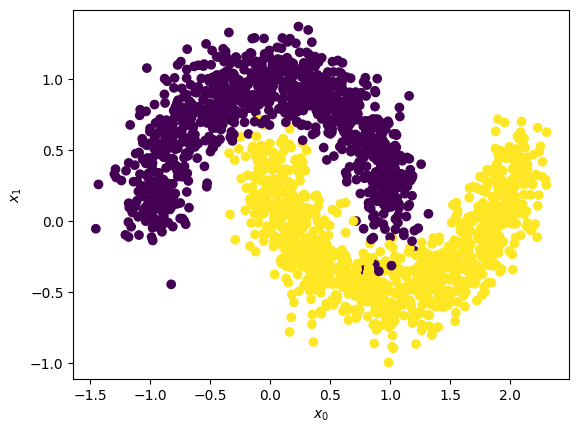

In [ ]:
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.show()

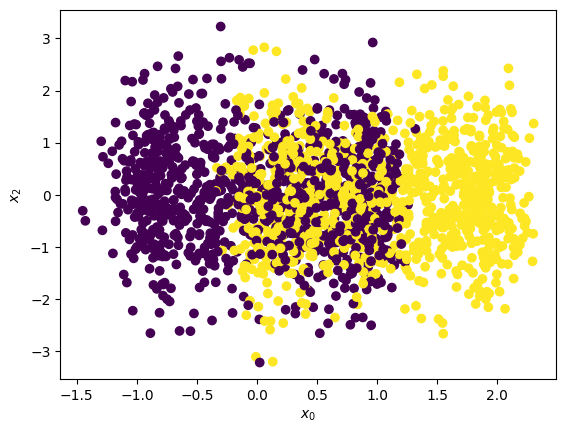

In [ ]:
plt.scatter(X_moons[:, 0], X_moons[:, 2], c=y_moons)
plt.xlabel('$x_0$')
plt.ylabel('$x_2$')
plt.show()

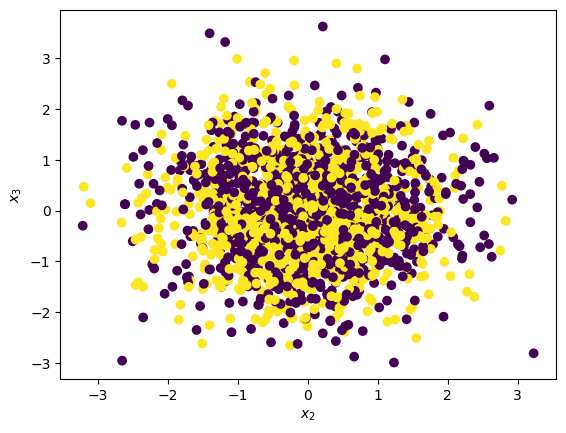

In [ ]:
plt.scatter(X_moons[:, 2], X_moons[:, 3], c=y_moons)
plt.xlabel('$x_2$')
plt.ylabel('$x_3$')
plt.show()

Казалось бы понизить размерность в этой задаче достаточно легко, нужно просто выбрать только первые две координаты. Однако из-за нелинейности разделяющей поверхности, для PCA это задача нетривиальна. Такая же ситуация наблюдается и в большинстве прикладных задач. Теперь переходите **к эксперименту** :)

In [ ]:
# Пример правильного обучения PCA с делением на train/test
pca_model = PCA(n_components=500)

X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(
    X_moons, y_moons, test_size=0.2) # делим выборку на трейн тест для оценки качества всего алгоритма

X_train_for_pca, X_train_for_svc, y_train_for_pca, y_train_for_svc = train_test_split(
    X_moons_train, y_moons_train, test_size=0.5) # делим выборку на трейн тест для оценки качества всего алгоритма

print(X_moons.shape, y_moons.shape)
print(X_moons_train.shape, y_moons_train.shape)
print(X_train_for_pca.shape, y_train_for_pca.shape)

# Учим PCA
pca_model.fit(X_train_for_pca)

# Применяем PCA
X_moons_test_transformed = pca_model.transform(X_moons_test)
X_train_for_svc_transformed = pca_model.transform(X_train_for_svc)

print(X_train_for_svc_transformed.shape)

# Учим SVC (на другой выборке чтобы не переобучиться)
svc_on_transformed = SVC(kernel='rbf')
svc_on_transformed.fit(X_train_for_svc_transformed, y_train_for_svc)

preds = svc_on_transformed.predict(X_moons_test_transformed)

print('Accuracy after PCA:', accuracy_score(preds, y_moons_test))

(2000, 1000) (2000,)
(1600, 1000) (1600,)
(800, 1000) (800,)
(800, 500)
Accuracy after PCA: 0.5825


In [26]:
X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(
    X_moons, y_moons, test_size=0.2) # делим выборку на трейн тест для оценки качества всего алгоритма
svc_on_transformed = SVC(kernel='rbf')
svc_on_transformed.fit(X_moons_train, y_moons_train)
print(accuracy_score(y_moons_test, svc_on_transformed.predict(X_moons_test)))

0.685


In [ ]:
'''
1. График зависимости времени работы всего цикла обучения от числа признаков  k,
которое остается после применения PCA

2. График зависимости качества решения (accuracy) задачи классификации от
числа признаков  k , которое остается после применения PCA.

При этом под полным циклом обучения подразумевается обучение PCA + обучение SVM.
Данные для обучения: первые две координаты - луны, которые были в первом
задании, а остальные координаты, случайные. Таким образом, без понижения
размерности SVM с rbf ядром должен иметь точность близкую к 100%.
Чтобы лучше видеть эффект на графиках, можете менять размер генерируемой выборки.
Для данных размеров  k  рекомендуется перебирать от 10 до 500 (тогда будет видна требуемая закономерность).

'''

In [19]:
import seaborn as sns

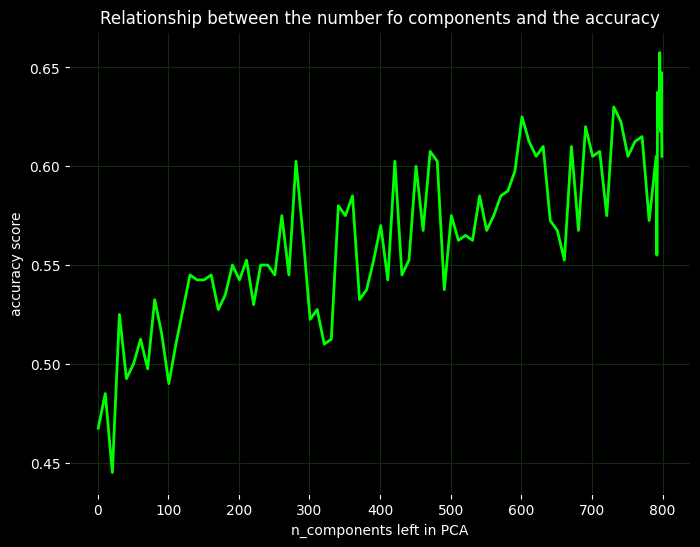

In [20]:
# 1. График зависимости времени работы всего цикла обучения от числа признаков  k,
# которое остается после применения PCA
accs = []
n_comps = list(range(1, 800, 10))
for n_components in n_comps:
    pca_model = PCA(n_components=n_components)
    X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(
        X_moons, y_moons, test_size=0.2)
    X_train_for_pca, X_train_for_svc, y_train_for_pca, y_train_for_svc = train_test_split(
        X_moons_train, y_moons_train, test_size=0.5)

    pca_model.fit(X_train_for_pca)
    X_moons_test_transformed = pca_model.transform(X_moons_test)
    X_train_for_svc_transformed = pca_model.transform(X_train_for_svc)

    svc_on_transformed = SVC(kernel='rbf')
    svc_on_transformed.fit(X_train_for_svc_transformed, y_train_for_svc)
    preds = svc_on_transformed.predict(X_moons_test_transformed)

    accs.append(accuracy_score(preds, y_moons_test))

n_comps_new = list(range(max(n_comps) + 1, 800))
for n_components in n_comps_new:
    pca_model = PCA(n_components=n_components)
    X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(
        X_moons, y_moons, test_size=0.2)
    X_train_for_pca, X_train_for_svc, y_train_for_pca, y_train_for_svc = train_test_split(
        X_moons_train, y_moons_train, test_size=0.5)

    pca_model.fit(X_train_for_pca)
    X_moons_test_transformed = pca_model.transform(X_moons_test)
    X_train_for_svc_transformed = pca_model.transform(X_train_for_svc)

    svc_on_transformed = SVC(kernel='rbf')
    svc_on_transformed.fit(X_train_for_svc_transformed, y_train_for_svc)
    preds = svc_on_transformed.predict(X_moons_test_transformed)

    accs.append(accuracy_score(preds, y_moons_test))

n_comps += n_comps_new
# PLOT PLOT PLOT PLOT PLOT PLOT
dgreen="#112C0B"

fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title("Relationship between the number fo components and the accuracy", color='white')
plt.xlabel("n_components left in PCA", color='white')
plt.ylabel("accuracy score", color='white')

sns.lineplot(x=n_comps, y=accs, label="n_components and accuracy", legend=False, color="lime", linewidth=2)

plt.grid(True, color=dgreen)
plt.show()

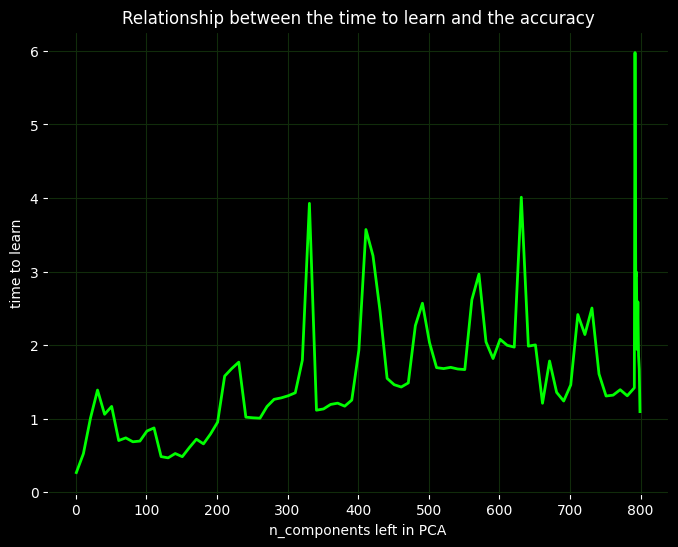

In [24]:
# 1. График зависимости времени работы всего цикла обучения от числа признаков  k,
# которое остается после применения PCA
times = []
n_comps = list(range(1, 800, 10))
for n_components in n_comps:
    pca_model = PCA(n_components=n_components)
    X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(
        X_moons, y_moons, test_size=0.2)
    X_train_for_pca, X_train_for_svc, y_train_for_pca, y_train_for_svc = train_test_split(
        X_moons_train, y_moons_train, test_size=0.5)

    start_time = time.time()
    pca_model.fit(X_train_for_pca)
    X_moons_test_transformed = pca_model.transform(X_moons_test)
    X_train_for_svc_transformed = pca_model.transform(X_train_for_svc)

    svc_on_transformed = SVC(kernel='rbf')
    svc_on_transformed.fit(X_train_for_svc_transformed, y_train_for_svc)
    preds = svc_on_transformed.predict(X_moons_test_transformed)

    times.append(time.time() - start_time)

n_comps_new = list(range(max(n_comps) + 1, 800))
for n_components in n_comps_new:
    pca_model = PCA(n_components=n_components)
    X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(
        X_moons, y_moons, test_size=0.2)
    X_train_for_pca, X_train_for_svc, y_train_for_pca, y_train_for_svc = train_test_split(
        X_moons_train, y_moons_train, test_size=0.5)

    start_time = time.time()
    pca_model.fit(X_train_for_pca)
    X_moons_test_transformed = pca_model.transform(X_moons_test)
    X_train_for_svc_transformed = pca_model.transform(X_train_for_svc)

    svc_on_transformed = SVC(kernel='rbf')
    svc_on_transformed.fit(X_train_for_svc_transformed, y_train_for_svc)
    preds = svc_on_transformed.predict(X_moons_test_transformed)

    times.append(time.time() - start_time)

n_comps += n_comps_new
# PLOT PLOT PLOT PLOT PLOT PLOT
dgreen="#112C0B"

fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title("Relationship between the time to learn and the accuracy", color='white')
plt.xlabel("n_components left in PCA", color='white')
plt.ylabel("time to learn", color='white')

sns.lineplot(x=n_comps, y=times, label="n_components and time", legend=False, color="lime", linewidth=2)

plt.grid(True, color=dgreen)
plt.show()

Опишите в выводе как ведет себя качество решения задачи и время работы в зависимости от числа компонент в PCA.  

**Вывод:** При числе компонент <= 100 предсказание не лучше, чем рандомизированное присвоение меток классов. А вот если убрать только 200-400 компонент, то предсказание остается на уровне 0.6 - 0.625, что, хотя и отличается от изначального, все же лучше, чем рандомное "предсказание". <br>
Зависимость времени от обучения, как и зависимость точности от числа компонент, походит на график функции логарифма. Больше признаков остается - больше времени для обучения.![st,small,507x507-pad,600x600,f8f8f8.u2.jpg](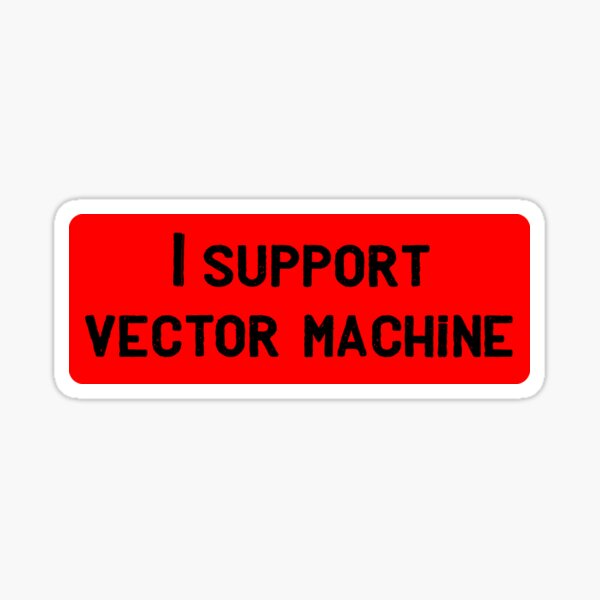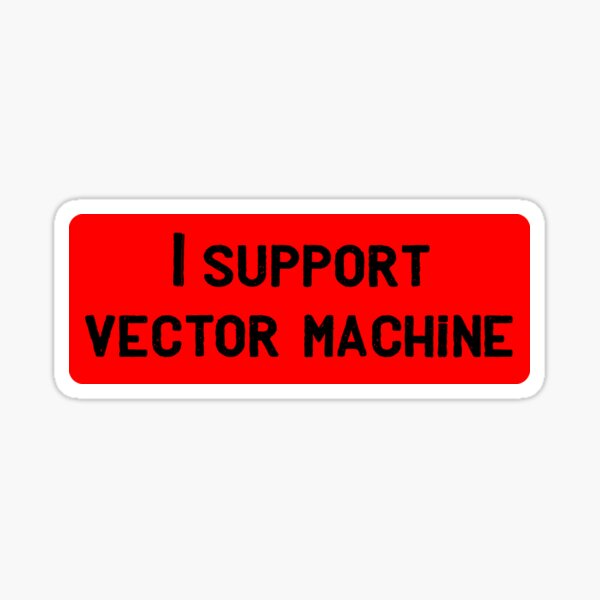)

# 7. Калибровка вероятностей (3 балла)

Иногда в задаче классификации важно знать уверенность отнесения к тому или иному классу. В SVM за это отвечает параметр отступа (margin), который можно посчитать, используя model.decision_function(X). Именно отступ до разделяющей кривой пытается максимизироавть модель во время обучения. Однако по нему сложно утверждать с какой вероятностью объект относится к тому или иному классу.

Чтобы это понять давайте построим следующую кривую:
1) нормализуем отступы так, чтобы они лежали в диапазоне от 0 до 1;

2) разделим все объекты на бины по нормализованному оступу (например на [0, 0.1), [0.1, 0.2)...);

3) для каждого бина построим точку с координатой x - равной среднему значению нормализованного оступа внутри бина, и с координатой y - равной доле объектов класса 1 внутри бина.

Заметим теперь, что если бы нормализованный отступ приблизительно равнялся вероятности отнесения к классу, то бину [x, x + 0.1) должна была бы соответствовать точка с координатой Х принадлежащей [x, x + 0.1) и координатой Y в том же диапазоне. Таким образом, чем лучше скоры модели показывают вероятность отнесения к классу 1, тем больше калибровочная кривая похожа на прямую из точки (0, 0) в (1, 1).

Кроме того построим аналогично кривую для логистической регрессии, взяв вместо нормализованного отступа - вероятность отнесения к первому классу через predict_proba. Так как логистическая регрессия оптимизирует LogLoss и её выходом уже являются вероятности отнесения к классам, будем ожидать что её кривая хорошо ляжет на прямую из (0, 0) в (1, 1).

In [27]:
from sklearn.datasets import make_classification
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:1000: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:1000: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


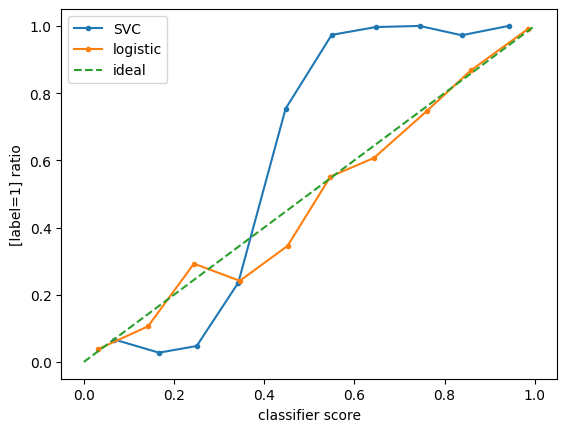

In [49]:

# generate 2 class dataset
X, y = make_classification(n_samples=5000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = SVC()
model.fit(trainX, trainy)
# predict probabilities
probs = model.decision_function(testX)

# reliability diagram
fop, mpv = calibration_curve(testy, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
# plot model reliability
plt.plot(mpv, fop, marker='.', label='SVC')
plt.xlabel('classifier score')
plt.ylabel('[label=1] ratio')

logistic_model = LogisticRegression()
logistic_model.fit(trainX, trainy)

logistic_probs = logistic_model.predict_proba(testX)[:, 1]

# reliability diagram
log_fop, log_mpv = calibration_curve(testy, logistic_probs, n_bins=10, normalize=True)
# plot perfectly calibrated
# plot model reliability
plt.plot(log_mpv, log_fop, marker='.', label='logistic')
plt.plot([0, 1], [0, 1], linestyle='--', label='ideal')
plt.legend()
plt.show()

-----------
<font color="white" style="opacity:0.2023"></font>

Вот мы и увидели проблему, линия отступов не ложится на пунктирную линию, что означает что оступы не соотвествуют реальным вероятностям отнесения к тому или иному классу.  

   Но не всё пропало! Из отступов всё ещё можно получить вероятность отнесения к классу. Для этого существует  такая процедура как калибровка вероятностей, при которой отступ для каждого объекта преобразовывается таким образом, чтобы соответствовать вероятности класса. После такого преобразования, полученное число становится интерпретируемой мерой уверенности модели.

В данном задании Вам прелагается обучить логистическую регрессию на отступах модели, которая по оступу (margin) предсказывала бы класс. Именно вероятности этой калибровочной модели и будут нашими верными оценками вероятности класса для объекта:

$p(y_i | x_i) = p(y_i | margin_i)$

Для этого Вам потребуется написать несложный класс CalibratingLogisticRegression. И проверить что новые предсказания дают правильную калибровочную кривую

In [66]:
from sklearn.linear_model import LogisticRegression

class CalibratingLogisticRegression:
    def __init__(self):
        self.lr = LogisticRegression()  # Initializing Logistic Regression model

    def fit(self, x, y):
        assert len(x.shape) == 1 or x.shape[1] == 1
        # Reshape x if needed for 1D input
        if len(x.shape) == 1:
            x = x.reshape(-1, 1)
        # Fit Logistic Regression model using x (margins) and y (labels)
        self.lr.fit(x, y)

    def predict_proba(self, x):
        assert len(x.shape) == 1 or x.shape[1] == 1
        # Reshape x if needed for 1D input
        if len(x.shape) == 1:
            x = x.reshape(-1, 1)
        # Predict probabilities using the trained Logistic Regression model
        calibrated_probs = self.lr.predict_proba(x)
        return calibrated_probs[:, 1]

Калибровочную модель и исходную модель нельзя учить на одних и тех же данных, чтобы избежать переобучения. (распределение отступов на обучении и тестовой выборке, скорее всего очень сильно отличается)

In [67]:
model = SVC()
N = len(trainX) // 2
model.fit(trainX[:N], trainy[:N])

SVC()

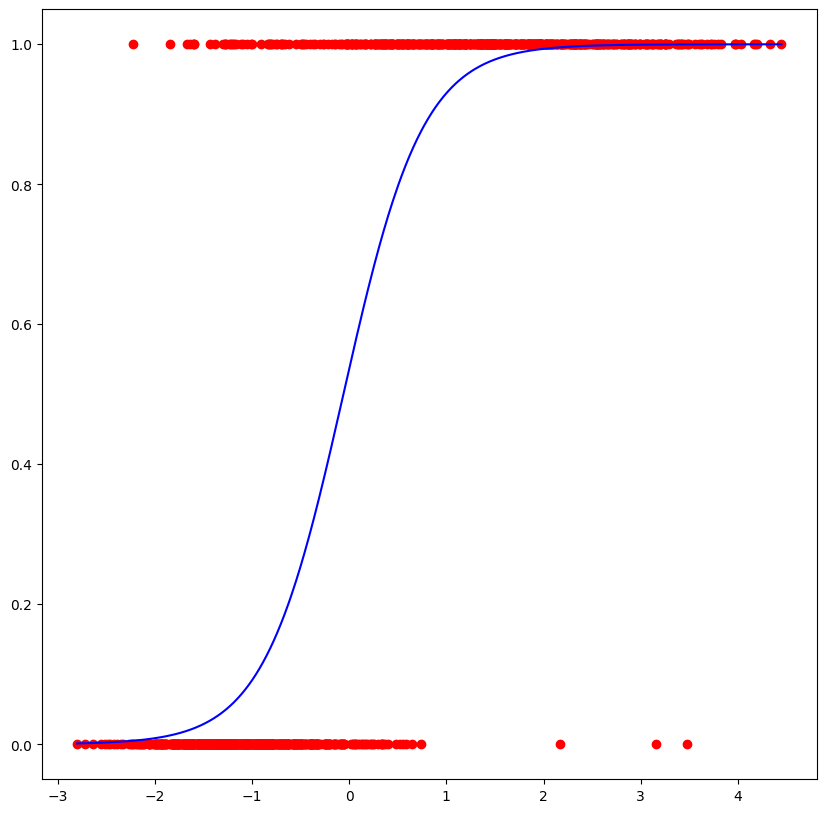

In [68]:
margin = model.decision_function(trainX[N:])


# Учим калибровочную модель на второй половине данных
calibrating_model = CalibratingLogisticRegression()
calibrating_model.fit(margin, trainy[N:])
prob = calibrating_model.predict_proba(margin)


# Как это выглядит на обучении
margin_sorted, probs_sorted_by_margin = zip(*sorted(zip(margin, prob)))
plt.figure(figsize=(10, 10))
plt.plot(margin, trainy[N:], 'ro')
plt.plot(margin_sorted, probs_sorted_by_margin, 'b')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:1000: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


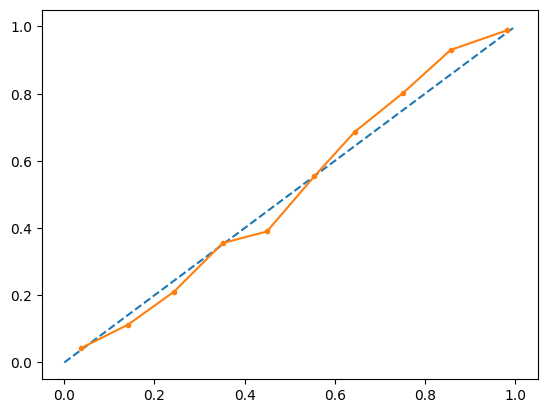

In [69]:
probs = calibrating_model.predict_proba(model.decision_function(testX))
# reliability diagram
fop, mpv = calibration_curve(testy, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
plt.plot(mpv, fop, marker='.')
plt.show()

Обратите внимание, что кривая для откалиброванных отступов должня также строиться для бинов и состоянть из n_bins точек. Если у Вас получилось кривая из трёх точек, Вы что-то сделали неправильно :)

**Сделайте выводы** о полученной модели. В каких задачах калибровка вероятностей могла бы быть полезной?

**Выводы:** после калибровки вероятностей кривая стала практически идеальной (идеальная - отрезок и (0,0) в (1,1)). Это значит, что после калибровки отступ очень близок к вероятности отнесения объекту к тому или иному классу. Так, умеем предсказывать вероятность после откалибровки предсказаний СВМ.<br>
Это может быть полезно в самых разных задачах. Отступ интерпретировать сложнее, чем вероятность отнесения к классу. Если учитывать, что СВМ - один из популярнейших методов для самых разных задач, то вот список таких задач, где предсказание именно вероятностей может быть полезно: <br>

Прогнозирование рисков и уверенность в решения <br>
Системы рекомендаций (тут, однако, кажется, чаще используют deep learning) <br>
Медицинская диагностика <br>
Финансовая аналитика <br>

# Бонусное задание (2 балла)

Найдите мем про SVM лучше чем этот:

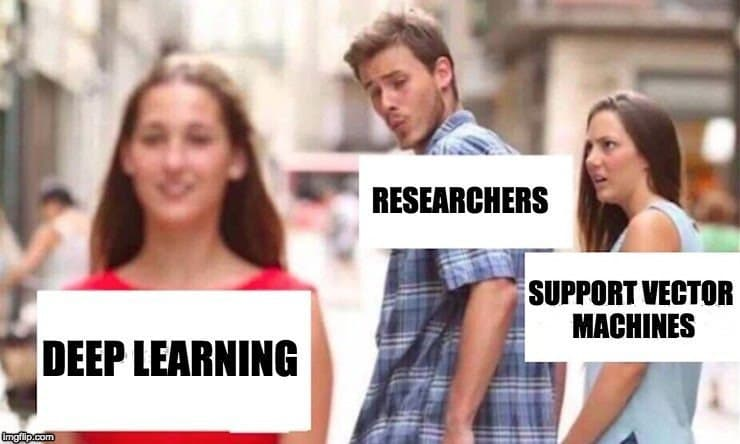

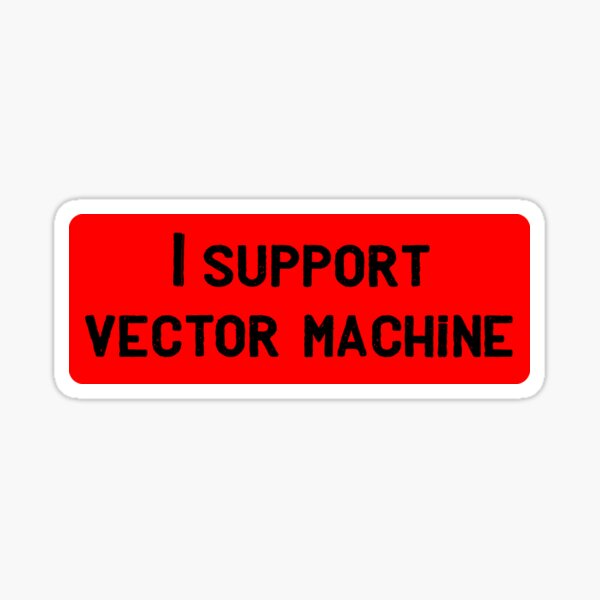